# The Demo of $S^2$Generator for Series-Symbol Data Generation

Time series data serves as the external manifestation of complex dynamical systems. This method aims to generate diverse complex systems represented by symbolic expressions $f(\cdot)$ — through unconstrained construction. It simultaneously generates excitation time series $X \in \mathbb{R} ^ {M \times L}$, which are then fed into the complex systems to produce their responses $Y=f(X) \in \mathbb{R} ^ {N \times L}$. Here, $M$, $N$ and $L$ denote the number of input channels, output channels, and series length, respectively.

In [1]:
import numpy as np
import sys
import os

sys.path.append(os.path.abspath(".."))
# Importing data generators, parameter controllers and visualization functions
from S2Generator import Generator, SeriesParams, SymbolParams, plot_series, print_hello

print_hello()

Hello, S2Generator!
Version: 0.0.1
This is a Python package for generating time series data with symbolic representations.
For more information, please visit: https://github.com/wwhenxuan/S2Generator

   _____   ___     _____                                        _                  
  / ____| |__ \   / ____|                                      | |                 
 | (___      ) | | |  __    ___   _ __     ___   _ __    __ _  | |_    ___    _ __ 
  \___ \    / /  | | |_ |  / _ \ | '_ \   / _ \ | '__|  / _` | | __|  / _ \  | '__|
  ____) |  / /_  | |__| | |  __/ | | | | |  __/ | |    | (_| | | |_  | (_) | | |   
 |_____/  |____|  \_____|  \___| |_| |_|  \___| |_|     \__,_|  \__|  \___/  |_|                                   



In [2]:
# Adjust the parameters here
# Create a parameter controls the generation of the excitation time series
series_params = SeriesParams()

# Create a parameter controls the generation of the symbolic expression (complex systems)
symbol_params = SymbolParams()

In [3]:
# Create an instance
generator = Generator(series_params=series_params, symbol_params=symbol_params, print_state=True, logging_path="../data")

rng = np.random.RandomState(0)  # Creating a random number object
# Start generating symbolic expressions, sampling and generating series

trees, x, y = generator.run(
    rng, input_dimension=1, output_dimension=1, n_inputs_points=256
)
# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

Basic Config for The S2Generator:
  mixed_distribution:  0.1                 autoregressive_moving_average: 0.2                 
  forecast_pfn:        0.35                kernel_synth:        0.25                
  intrinsic_mode_function: 0.1                 
  Min Binary Operator: 0                   Max Binary Operator: 1                   
  Min Unary Operator:  0                   Max Unary Operator:  5                   
  Max Trials:          64                  Solve Diff           0                   
  Probability Random:  0.25                Probability Const:   0.25                

Generation Config for The S2Generator:


TypeError: unsupported format string passed to NoneType.__format__

(-0.788 add (inv((14.5 add (98.7 mul x_0))) mul (((91.5 mul x_0) add ((-37.2 mul rand) sub (-4.18 mul x_0))))**2))


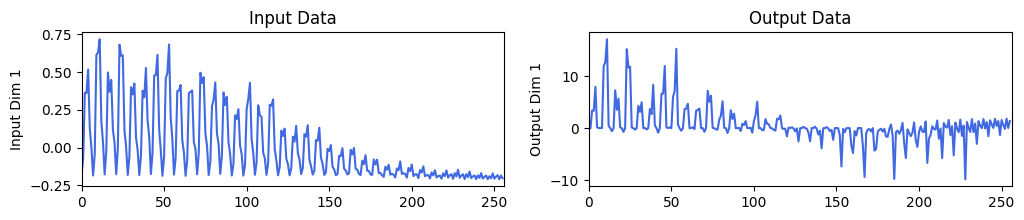

In [6]:
# Adjust the parameters here
symbol_params = SymbolParams()
# Set the order of differential equation solving
symbol_params.solve_diff = 1

# Create an instance
generator = Generator(series_params=series_params, symbol_params=symbol_params)

# Creating a random number object
rng = np.random.RandomState(20)
# Start generating symbolic expressions, sampling and generating series
trees, x, y = generator.r(
    rng, input_dimension=1, output_dimension=1, n_inputs_points=256
)

# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

(256, 1)
(23.6 add ((-5.44 mul x_0) sub (-27.5 mul x_1))) | (-7.42 add (-0.729 mul x_0))


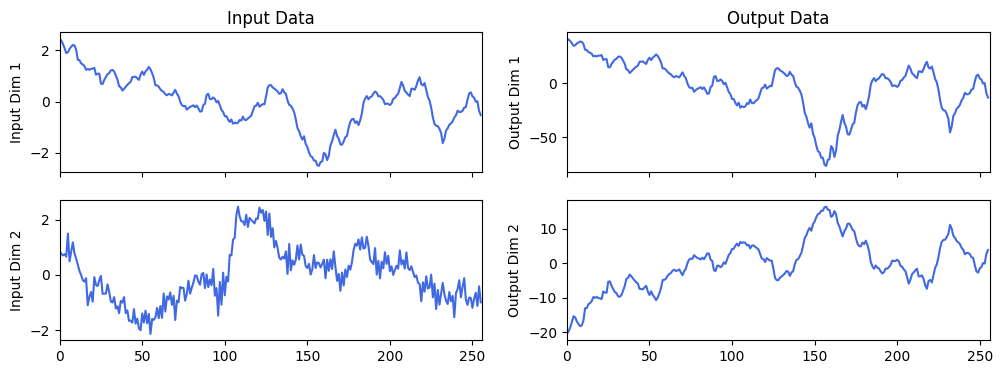

In [4]:
rng = np.random.RandomState(556)  # Change the random seed
params.solve_diff = 1  # Set the order of differential equation solving
# Try to generate the multi-channels time series
trees, x, y = generator.run(rng, input_dimension=2, output_dimension=2, n_points=256)
print(trees)
fig = plot_series(x, y)

In [6]:
fig.savefig("../images/ID2_OD2.jpg", dpi=300, bbox_inches="tight")

(256, 1)
(256, 1)
(33.4 add (((-4.18 mul sqrt((-7.4 add (83.8 mul x_2)))) add (-5.0 mul ((-0.131 add (-6.14 mul x_0)))**2)) add (0.544 mul ((0.786 add (80.1 mul x_1)))**3))) | (-34.5 add (-53.9 mul x_0)) | (-3.2 add ((((2.57 mul x_1) sub (0.47 mul cos((0.256 add (-60.4 mul x_1))))) add (32.7 mul ((-5.87 add (-0.647 mul x_2)))**2)) mul sqrt((0.54 add (-4.6 mul (x_0 mul (x_0 mul x_2)))))))


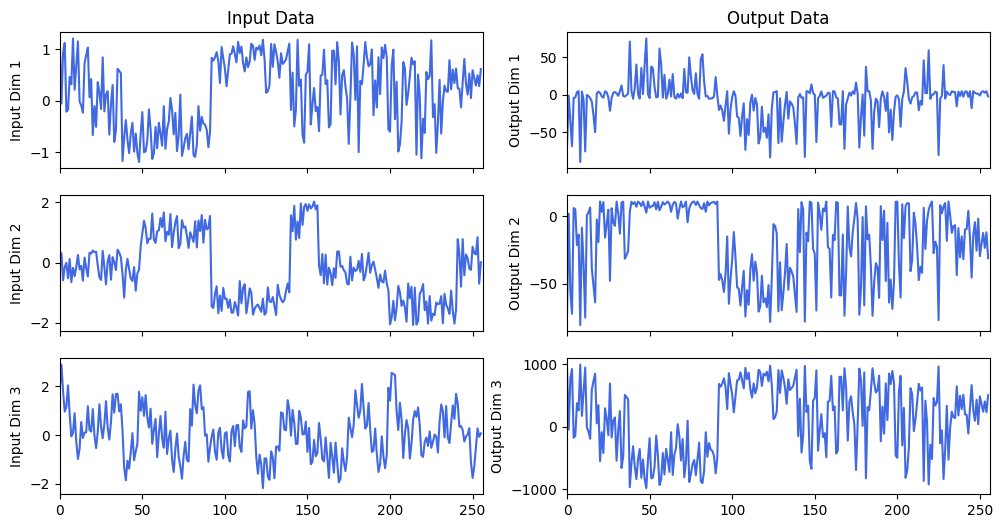

In [5]:
# Try to generate the 3-channels time series
trees, x, y = generator.run(rng, input_dimension=3, output_dimension=3, n_points=256)
print(trees)
fig = plot_series(x, y)

In [6]:
fig.savefig("../images/ID3_OD3.jpg", dpi=300, bbox_inches="tight")